In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
#Read in the Shark  Attacks excel file
shark_attack = Path("Resources/global-shark-attack_cleaned.xlsx")
shark_data = pd.read_excel(shark_attack)
shark_data.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,2022-09-03,2022.0,Unprovoked,USA,Hawaii,"Lower Paia Beach Park, Maui",Swimming or Snorkeling,female,F,51.0,...,N,16h10,NaN,"Star Advertiser, 9/3/2022",2022.09.03-Maui.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.09.03,2022.09.03,6800.0
1,2022-07-03,2022.0,Unprovoked,USA,New York,"Smith Point Beach, Suffolk County",Lifeguard Exercises,Zach Gallo,M,NaN,...,N,10h15,5'shark,"ABC7,7/3/2022",2022.07.03.a-Gallo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.07.03.a,2022.07.03.a,6778.0
2,2022-03-15,2022.0,Unprovoked,NEW ZEALAND,South Island,Cobden,Surfing,Carl Colville,M,NaN,...,N,NaN,NaN,"Otago Daily Times, 3/18/20229/2022",2022.03.15.c-Colville.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.03.15.c,NaN,6747.0
3,2021-09-03,2021.0,Unprovoked,British Overseas Territory,Turks and Caicos,NaN,NaN,male,M,NaN,...,N,NaN,NaN,Anonymous,2021.09.03.b-TurksCaicos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.09.03.b,2021.09.03.b,6705.0
4,2021-01-07,2021.0,Unprovoked,NEW ZEALAND,North Island,"Waihī Beach, Bay of Plenty",Swimming,Kaelah Marlow,F,19.0,...,Y,17h10,NaN,"C. Black, GSAF",2021.01.07-Marlow.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.01.07,2021.01.07,6620.0


In [3]:
#Data Clean: Drop all columns except Time and Date, drop missing values
clean_shark = pd.DataFrame(shark_data[['Time', 'Date']])
clean_shark= clean_shark.dropna()
clean_shark

,Time,Date
0,16h10,2022-09-03
1,10h15,2022-07-03
4,17h10,2021-01-07
5,15h20,2020-12-06
6,06h00,2020-11-02
...,...,...
6159,06h00,1888-02-17
6160,12h00,1887-01-12
6162,Morning,1882-11-12
6169,Evening,1830-07-02


In [4]:
#Converting rows in 00h00 format to 00 format
clean_shark['Time'] = clean_shark["Time"].str.replace(r'(\d{2})[hj]+\d{2,3}' , r'\1', regex=True)
clean_shark

,Time,Date
0,16,2022-09-03
1,10,2022-07-03
4,17,2021-01-07
5,15,2020-12-06
6,06,2020-11-02
...,...,...
6159,06,1888-02-17
6160,12,1887-01-12
6162,Morning,1882-11-12
6169,Evening,1830-07-02


In [5]:
#Regex code to delete "--", "/\", and spaces. Shows unique values left
clean_shark['Time'] = clean_shark["Time"].str.replace(r'(\d{2})\s*/\s*\d{2}' , r'\1', regex=True)
clean_shark['Time'] = clean_shark["Time"].str.replace(r'(\d{2})\s*-+\s*d{2}' , r'\1', regex=True)
clean_shark['Time'].unique()

array(['16', '10', '17', '15', '06', 'Morning', '14', '08', '14  -15',
       '09', '12', '07', '13', 'Afternoon', '18', '11', '03', 'Evening',
       '22', '19', '18 (Sunset)', 'Mid-morning', 'Night', 'Late night',
       '20', 'Late afternoon', 'Midnight', 'A.M.', 'Lunchtime',
       'Just before dawn', 'Midday', 'Early morning', '09 - 09', 'Dusk',
       '>06', '05', 'P.M.', '21', 'After 04', '07 - 08', '23', 'Sunset',
       '>08', 'Just after 12', 'Dawn', '10 -- 11', '--', '`17',
       '30 minutes after 1992.07.08.a', '04', '17-18', '02',
       'Early afternoon', '03 - 04', 'Midday.', '1600', 'Daytime', '15j',
       'shortly before dusk', '-16', 'Just before sundown', 'Mid morning',
       'X', '>14', '01', '10-11', 'Shortly after midnight', '<07',
       'Before daybreak', '06 -- 07', '11hoo', 'Noon', 'Dark', '18-18',
       '0830', 'Prior to 10', 'Daybreak', 'After noon',
       'Just before noon', 'Late morning', 'After dusk',
       'Sometime between 06 & 08hoo', 'Early  mo

In [6]:
#Replacing words with numbers and showing unique values
clean_replaced= clean_shark.replace(to_replace={'Night':'22', 'Evening':'19', 'Afternoon':'14', 
                                                     'After noon':'14','Noon':'12', 'Morning':'07', 'Midday':'12',
                                                     'Early afternoon': '13', 'Late afternon':'15',
                                                    'Midnight': '24', 'Shortly after midnight':'1',
                                                    'Early morning':'06', 'Late Afternoon':'16', 'After midnight':'02',
                                                     'Late night':'22','Mid morning':'09', 'Mid afternoon':'15',
                                                    'Late morning':'11','Just before noon':'11', 'Lunchtime':'12',
                                                    'Early evening':'17','Mid-morning':'09', 
                                                'Before daybreak':'05', 'P.M.':'15','A.M.':'05',
                                               'After dusk':'20','Dusk':'18','Ship aban-doned at 03':'03',
                                                '11 -time of ship sinking':'11','After 04':'04','After dark':'20',
                                               'Nightfall':'19','Dark':'22', 'After Dusk':'20',
                                                'Early Morning':'06','Late afternoon':'16', 
                                                'shortly before dusk':'16', '2 hrs before sunset':'16',
                                                'Midday':'12','night':'20','Dawn':'07','Just before dawn':'06',
                                               'Daytime':'15', 'Daybreak':'07','Prior to 10':'09',
                                                'Sunset':'18','18?':'18','Just before sundown':'17', 
                                               'AM':'03','Shortly before 12':'11', 'Early  morning': '06',
                                               'Midday.':'12', 'Between 06 & 07':'06', '8:04 pm':'08',
                                               'Shortly before 13':'12', 'Sometime between 06 & 08hoo':'07',
                                               'Before 10':'09', 'Just before 11':'10', '13.0':'13',
                                                '19, Dusk':'19','Just after 12':'11','11hoo':'11',
                                                '17 Sunset':'17','18 (Sunset)':'18','20 (Sunset)':'20',
                                               '22':'22','Before 07':'06', '13.0':'13','9h00':'09','`17':'17',
                                                ' 07':'07'}, inplace=False)
clean_replaced['Time'].unique()

array(['16', '10', '17', '15', '06', '07', '14', '08', '14  -15', '09',
       '12', '13', '18', '11', '03', '19', '22', '20', '24', '05',
       '09 - 09', '>06', '21', '04', '07 - 08', '23', '>08', '10 -- 11',
       '--', '30 minutes after 1992.07.08.a', '17-18', '02', '03 - 04',
       '1600', '15j', '-16', 'X', '>14', '01', '10-11', '1', '<07',
       '06 -- 07', '18-18', '0830', '17 or 17', '09 -10', '10 or 14',
       '16 or 18', '09-10', '1300.0', 'N', '15 or 15', '14-15',
       '18 to 21', '>12', '14 - 15', '>17',
       'FATAL  (Wire netting installed at local beaches after this incident.)',
       '0500', '10 or 13', '2 hours after Opperman', '19-20'],
      dtype=object)

In [7]:
#Regex codes to delete various extra elements and clean data more
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'(\d{2})[-\s]+\d{2}' , r'\1', regex=True)
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'[><](\d{2})', r'\1', regex=True)
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'(\d{2})j$' , r'\1', regex=True)
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'(\d{2})\s*or\s*\d{2}' , r'\1', regex=True)
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'(\d{2})\s*to\s*\d{2}' , r'\1', regex=True)
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'(\d{2})\d{2}' , r'\1', regex=True)
clean_replaced['Time'].unique()

array(['16', '10', '17', '15', '06', '07', '14', '08', '09', '12', '13',
       '18', '11', '03', '19', '22', '20', '24', '05', '21', '04', '23',
       '--', '30 minutes after 19.07.08.a', '02', '-16', 'X', '01', '1',
       '13.0', 'N',
       'FATAL  (Wire netting installed at local beaches after this incident.)',
       '2 hours after Opperman'], dtype=object)

In [8]:
#Cleaning data more by keeping only numerical values
times_df = clean_replaced.loc[clean_replaced['Time'].str.isnumeric(),:]
times_df=times_df.astype({"Time":'int64'}, errors='raise')
times_df

,Time,Date
0,16,2022-09-03
1,10,2022-07-03
4,17,2021-01-07
5,15,2020-12-06
6,6,2020-11-02
...,...,...
6159,6,1888-02-17
6160,12,1887-01-12
6162,7,1882-11-12
6169,19,1830-07-02


In [9]:
#Using bins to group times into three categories (Morning, Midday, Night)
bins=[0, 11, 17, 24]
labels= ["Morning", "Midday", "Night"]
times_df['Group']= pd.cut(times_df['Time'], bins, labels=labels, include_lowest=True)
times_df

,Time,Date,Group
0,16,2022-09-03,Midday
1,10,2022-07-03,Morning
4,17,2021-01-07,Midday
5,15,2020-12-06,Midday
6,6,2020-11-02,Morning
...,...,...,...
6159,6,1888-02-17,Morning
6160,12,1887-01-12,Midday
6162,7,1882-11-12,Morning
6169,19,1830-07-02,Night


In [10]:
#Replacing grammatical error in two of the dates and organizing dates based on just months
times_df= times_df.replace(to_replace={'202-07-10':'2020-07-10'})
times_df= times_df.replace(to_replace={'144-07-22':'1444-07-22'})
times_df['Month']= times_df['Date'].str.replace(r'\d{4}-(\d{2})-\d{2}' , r'\1', regex=True)
times_df

,Time,Date,Group,Month
0,16,2022-09-03,Midday,09
1,10,2022-07-03,Morning,07
4,17,2021-01-07,Midday,01
5,15,2020-12-06,Midday,12
6,6,2020-11-02,Morning,11
...,...,...,...,...
6159,6,1888-02-17,Morning,02
6160,12,1887-01-12,Midday,01
6162,7,1882-11-12,Morning,11
6169,19,1830-07-02,Night,07


In [11]:
#Determining how many attacks each group has
group_counts = times_df.value_counts(['Group']).reset_index()
group_counts

,Group,count
0,Midday,1707
1,Morning,1086
2,Night,358


In [12]:
#Determining how many attacks each month has
month_counts = times_df.value_counts(['Month']).reset_index()
month_counts

,Month,count
0,07,364
1,08,321
2,09,316
3,06,279
4,01,269
5,10,263
6,04,254
7,12,233
8,03,225
9,05,223


In [13]:
#Putting months in order and replacing numerical values with the name of the month
month_counts = month_counts.sort_values(by="Month")
month_counts["Month"] = month_counts["Month"].replace({'01':'January','02':'February','03':'March','04':'April','05':'May',
                                                      '06':'June','07':'July','08':'August','09':'September','10':'October',
                                                      '11':'November','12':'December'})
month_counts

,Month,count
4,January,269
11,February,198
8,March,225
6,April,254
9,May,223
3,June,279
0,July,364
1,August,321
2,September,316
5,October,263


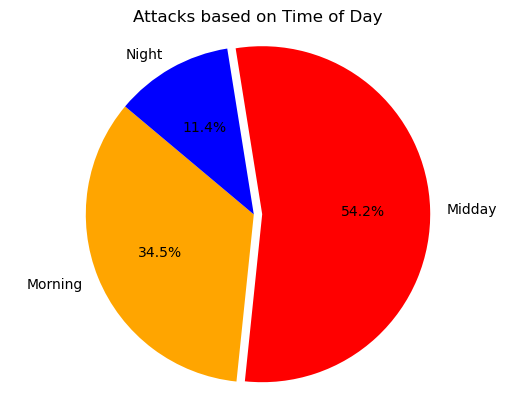

In [14]:
#Create pie chart for groups (Morning, Midday, Night)
group_counts
categories = ['Morning','Midday','Night']
values = [1086, 1707, 358]
colors = ['orange', 'red', 'blue']
explode = (0, 0.05,0)
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')
plt.title('Attacks based on Time of Day')
plt.savefig("Attacks based on Time.png")
plt.show()

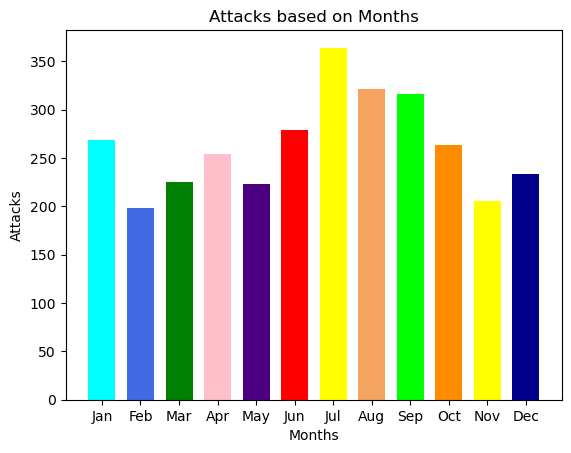

In [15]:
#Create bar graph for months
month_counts
categories = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
values = [269,198,225,254,223,279,364,321,316,263,206,233]
colors = ['cyan','royalblue','green','pink','indigo','red','yellow','sandybrown','lime','darkorange','yellow','darkblue']
plt.bar(categories,values, color=colors, width=0.7)
plt.xlabel("Months")
plt.ylabel("Attacks")
plt.title("Attacks based on Months")
plt.savefig("Attack based on months.png")
plt.show()